In [1]:
import pandas as pd
import numpy as np
import re
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
trumpTweets_DF = pd.read_csv("realdonaldtrump.csv", sep=",")
trumpTweets_DF
tweetsContent = trumpTweets_DF["content"].to_numpy()
tweetsContent = tweetsContent[:10]

EMBEDDING = 5

In [3]:
def normalize(vector) :
	return vector / np.linalg.norm(vector)

In [4]:
wordsDataFrameList = []
for tweet in tweetsContent:
	wordsDataFrameList.append(pd.DataFrame())
	# wordsDataFrameList.append(pd.DataFrame(index=[word for word in re.split("\,\s|\.\s|\:\s|\s", tweet)]))
	wordsDataFrameList[-1]["word"] = [word for word in re.split("\,\s|\.\s|\:\s|\s", tweet)]
	wordsDataFrameList[-1]["vector"] = [normalize(v) for v in [np.random.rand(EMBEDDING) * 2 - 1 for _ in range(wordsDataFrameList[-1].index.size)]]
	wordsDataFrameList[-1]["ctx vector"] = [normalize(v) for v in [np.random.rand(EMBEDDING) * 2 - 1 for _ in range(wordsDataFrameList[-1].index.size)]]

In [5]:
WINDOW = 2
def GetWindowRange(data : pd.DataFrame, wordIdx) :
	Lshift, Rshift = [0,0]
	if wordIdx - WINDOW < 0 :
		Lshift = WINDOW - wordIdx
	if wordIdx + WINDOW + 1 > data.index.size :
		Rshift = WINDOW + wordIdx + 1 - data.index.size
	return (wordIdx - WINDOW + Lshift, wordIdx + WINDOW + 1 - Rshift)

In [6]:
# NEG_SAMPLING = 3

# # for idx in range(1) : 
# for dataset in wordsDataFrameList :
# 	dataset["context"] = [pd.DataFrame() for _ in range(dataset.shape[0])]
# 	for i in zip(range(dataset.shape[0]), dataset.index) :
# 		tmp = {dataset.iloc[offset].name: 1 for offset in range(GetWindowRange(dataset, i[0])[0], GetWindowRange(dataset, i[0])[1]) if dataset.iloc[offset].name != i[1]}
# 		dataset["context"][i[1]].index = tmp.keys()
# 		dataset["context"][i[1]]["label"] = tmp.values()
# 		for _ in range(NEG_SAMPLING) :
# 			timeout = 100
# 			while True :
# 				sampleWordIdx = np.random.randint(0, dataset.shape[0])
# 				sampleWord = dataset.iloc[sampleWordIdx].name
# 				if sampleWord not in dataset["context"][i[1]].index :
# 					break
# 				timeout -= 1
# 				if timeout == 0 :
# 					print("Unable to find word outside context window for word " + i[1])
# 					sampleWord = np.NAN
# 					break
# 			dataset["context"][i[1]].loc[sampleWord] = 0

In [7]:
NEG_SAMPLING = 3

# for idx in range(1) : 
for dataset in wordsDataFrameList :
	dataset["context"] = [pd.DataFrame() for _ in range(dataset.shape[0])]
	for i in range(dataset.shape[0]) :
		tmp = {dataset["word"][offset] : [offset, 1] for offset in range(GetWindowRange(dataset, i)[0], GetWindowRange(dataset, i)[1]) if dataset["word"][offset] != dataset["word"][i]}
		dataset["context"][i]["idx"] = [pair[0] for pair in tmp.values()]
		dataset["context"][i]["label"] = [pair[1] for pair in tmp.values()]
		dataset["context"][i].index = tmp.keys()

		for _ in range(NEG_SAMPLING) :
			timeout = 100
			while True :
				sampleWordIdx = np.random.randint(0, dataset.shape[0])
				sampleWord = dataset["word"][sampleWordIdx]
				if sampleWord not in dataset["context"][i].index :
					break
				timeout -= 1
				if timeout == 0 :
					print("Unable to find word outside context window for word " + dataset["word"][i])
					sampleWord = np.NAN
					break
			dataset["context"][i].loc[sampleWord] = [sampleWordIdx, 0]

In [8]:
wordsDataFrameList[0]

,word,vector,ctx vector,context
0,Be,"[-0.5934795130419025, 0.1460806885800951, 0.51...","[-0.3321774831453114, -0.6136813369577558, -0....",idx label sure 1 1 to 2 ...
1,sure,"[0.3551222281775067, -0.554649081121133, -0.37...","[-0.5101087902216086, 0.24265866695771424, 0.3...",idx label Be 0 1 to 2...
2,to,"[-0.5183657474696399, -0.526257998444987, 0.05...","[0.28834658576845396, -0.6143081277363964, -0....",idx label Be 0 1 sure 1 ...
3,tune,"[0.41004284945568226, 0.7277588605146673, -0.1...","[-0.6503017899973451, -0.2991545088589986, -0....",idx label sure 1 1 to ...
4,in,"[0.5284678036356333, 0.298294908383005, 0.3293...","[0.4425834926125266, -0.4858916498161432, -0.4...",idx label to 2 1 tune 3...
5,and,"[-0.4082068677518238, 0.43427550824904576, 0.4...","[-0.6668192790369196, -0.04154382828339608, 0....",idx label tune 3 1 in ...
6,watch,"[-0.3261792306123445, -0.4653652979076874, -0....","[-0.5566022990494368, 0.5998637540625467, 0.18...",idx label in 4 1 and ...
7,Donald,"[0.45400648885953676, 0.25352218837865464, -0....","[0.2609346287893313, -0.7419458981838825, 0.05...",idx label and 5 1 watch ...
8,Trump,"[0.20698298212330965, -0.6725918886541571, 0.2...","[-0.4781285884214576, -0.5872563043479716, 0.5...",idx label watch 6 1 Donald ...
9,on,"[0.11288909905731613, -0.3392841971766197, -0....","[0.1284984819031136, 0.24135038753942092, 0.67...",idx label Donald 7 1 Trum...


In [9]:
def plot(data : pd.DataFrame, words = None) :
	if words is None :
		words = data["word"].tolist()

	pca = PCA(n_components=2)
	vec = pca.fit_transform(np.vstack(data["vector"].loc[data["word"].isin(words)]))
	ctx_vec = pca.fit_transform(np.vstack(data["ctx vector"].loc[data["word"].isin(words)]))

	plt.figure(figsize=(12, 5))
	plt.subplot(1,2,1)
	x = [v[0] for v in vec]
	y = [v[1] for v in vec]
	plt.scatter(x, y)
	plt.title("Word vectors")
	for i, word in enumerate(data["word"].loc[data["word"].isin(words)]) :
		plt.annotate(word, (x[i], y[i]))
	
	plt.subplot(1,2,2)
	x_ctx = [v[0] for v in ctx_vec]
	y_ctx = [v[1] for v in ctx_vec]
	plt.scatter(x_ctx, y_ctx, color=['orange'])
	plt.title("Word context vectors")
	for i, word in enumerate(data["word"].loc[data["word"].isin(words)]) :
		plt.annotate(word, (x_ctx[i], y_ctx[i]))

In [10]:
def score(data : pd.DataFrame) :
	scores = []
	for i in range(data.shape[0]) :
		vector_sum = np.array([data["ctx vector"][j] for j in data["context"][i]["idx"]])
		vector_sum_idx = np.array([j for j in data["context"][i]["idx"]])
		scores.append(pd.DataFrame(index=vector_sum_idx, data=sp.special.expit(np.dot(vector_sum, data["vector"][i])), columns=["score"]))

	return scores

In [11]:
def accuracy(score : pd.DataFrame) :
	acc = 0
	for score_df in score :
		acc += np.log(score_df["score"]).sum()
	return acc

In [12]:
def update(data : pd.DataFrame, learning_rate : float, tol : float) :
	scores = score(data)
	copy = data.copy()
	for i in range(data.shape[0]) :
		for j in data["context"][i]["idx"] :
			bias = (data["ctx vector"][j] - data["vector"][i]) * (data["context"][i]["label"][data["word"][j]] - scores[i]["score"][j]) * learning_rate
			copy["vector"][i] = bias + copy["vector"][i]
			copy["ctx vector"][j] = bias - copy["ctx vector"][j]
	copy["vector"] = [normalize(copy["vector"][i]) for i in range(copy.shape[0])]
	copy["ctx vector"] = [normalize(copy["ctx vector"][i]) for i in range(copy.shape[0])]

	return copy

In [13]:
def train(data : pd.DataFrame, learning_rate : float, max_steps: int, tol : float = 1e-1) :
	# data_list = []
	for i in range(max_steps) :
		data = update(data, learning_rate, tol)
		# data_list.append(data)
		if (i + 1) % int(max_steps / 10) == 0 :
			print("Processing: %d" % int((i + 1) / max_steps * 100) + "%")
			plot(data)
	return data

Processing: 10%
Processing: 20%
Processing: 30%
Processing: 40%
Processing: 50%
Processing: 60%
Processing: 70%
Processing: 80%
Processing: 90%
Processing: 100%


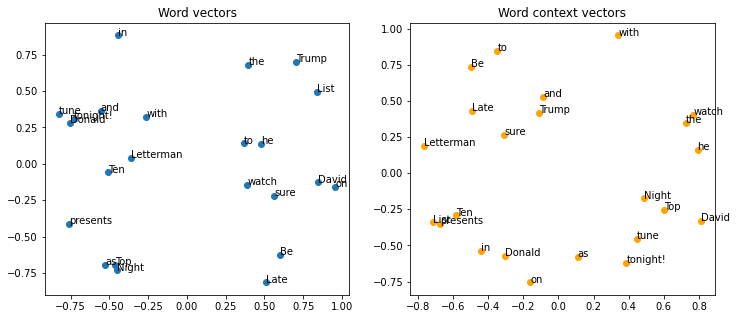

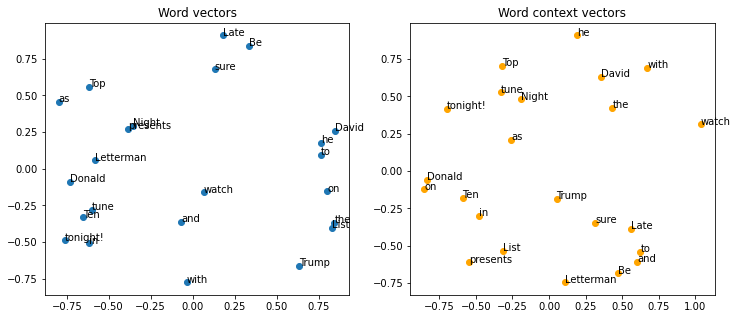

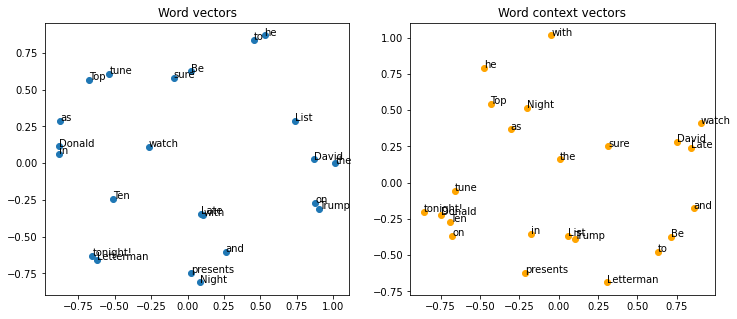

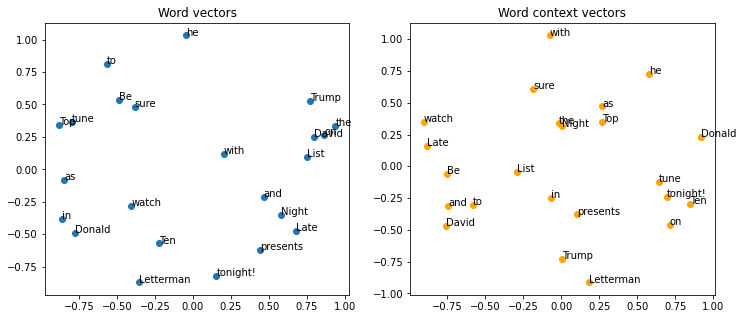

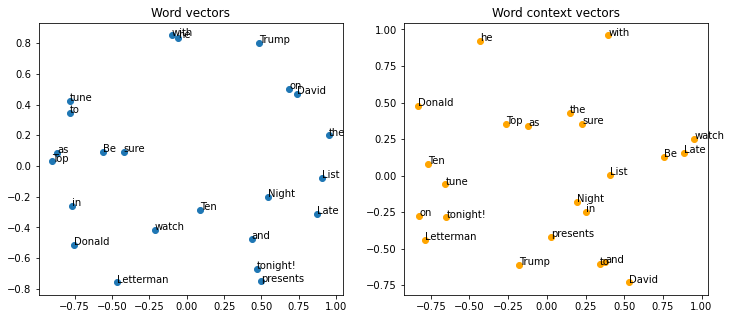

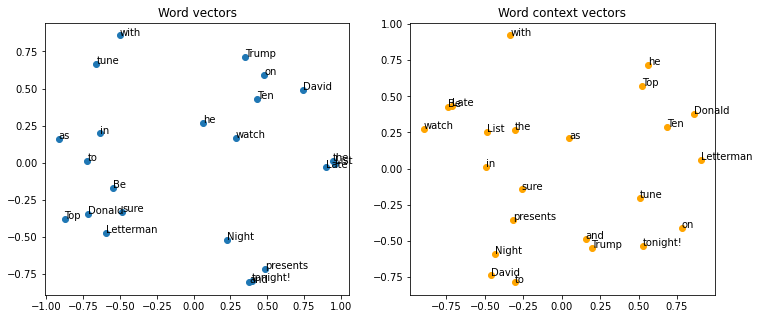

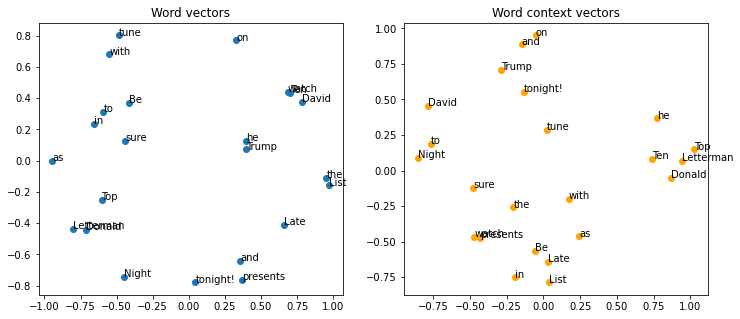

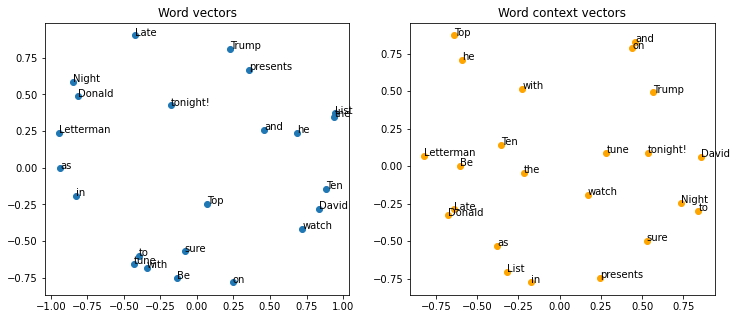

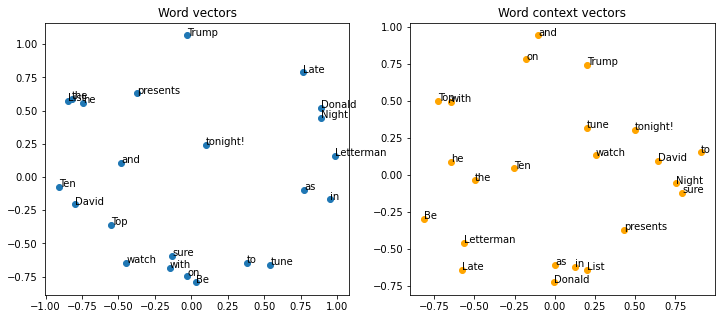

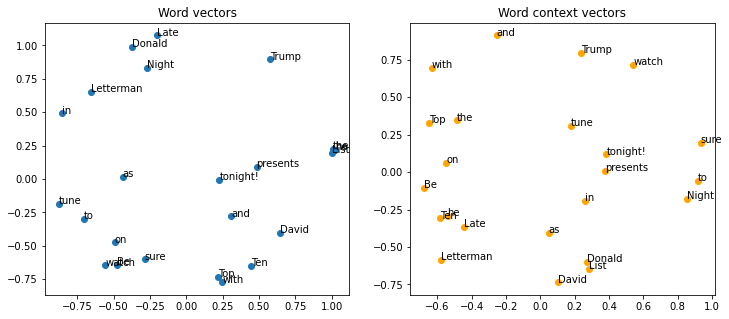

In [14]:
asd = train(wordsDataFrameList[0], 0.1, 100, 1e-1)